In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Préparation des données

##importer la data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance (2).csv


In [ ]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## transformer les variables catégorielles en variables numériques

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## le nombre de valeurs manquantes pour chaque colonne

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Note**:Le résultat df.isnull().sum() indique qu'il n'y a aucune valeur manquante (NaN) dans chaque colonne du DataFrame. Cela signifie que toutes les colonnes contiennent des valeurs pour chaque enregistrement.

# Analyse exploratoire des données (AED)

##  les statistiques descriptives du DataFrame

In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## matrice de correlation

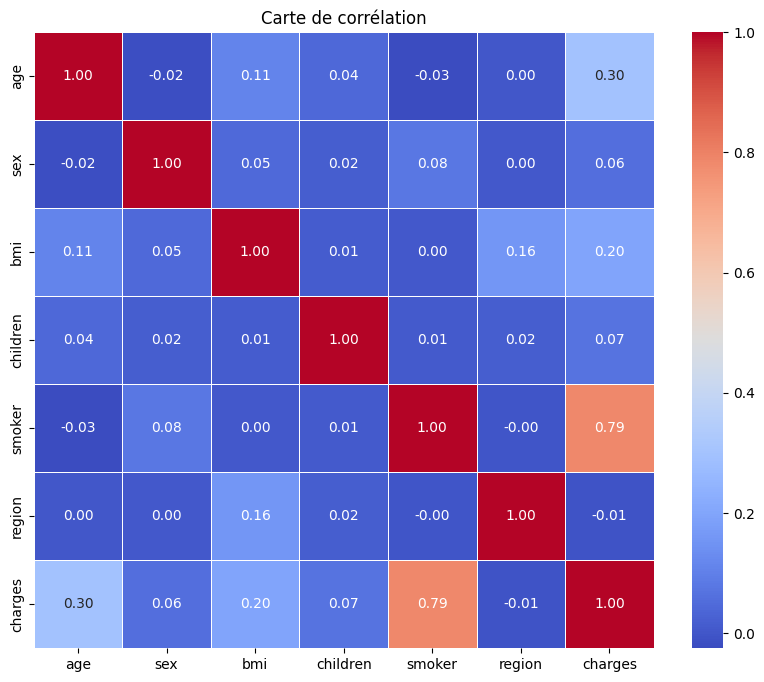

In [ ]:
matrice_correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Carte de corrélation")
plt.show()

on remarque une forte correlation entre la variable smoker et la variable charges

## Distribution

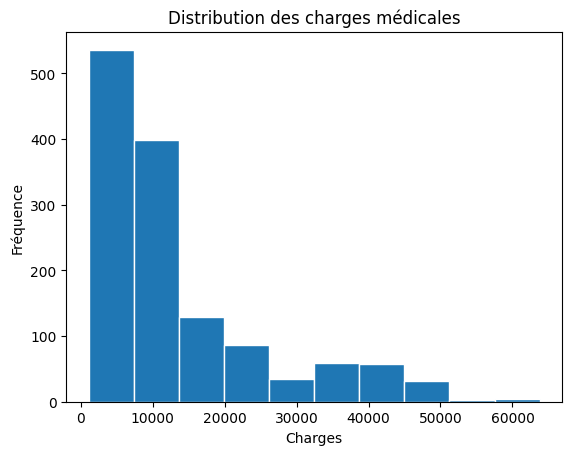

In [ ]:
plt.hist(df['charges'],  edgecolor='#FFFFFF')
plt.xlabel('Charges')
plt.ylabel('Fréquence')
plt.title('Distribution des charges médicales')
plt.show()

<ipython-input-162-4df09b4fa8fe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 1)]["charges"],color='b',ax=ax)
<ipython-input-162-4df09b4fa8fe>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 0)]['charges'],color='#AA62E6',ax=ax)


Text(0.5, 1.0, 'la distribution des charges pour les non-fumeurs')

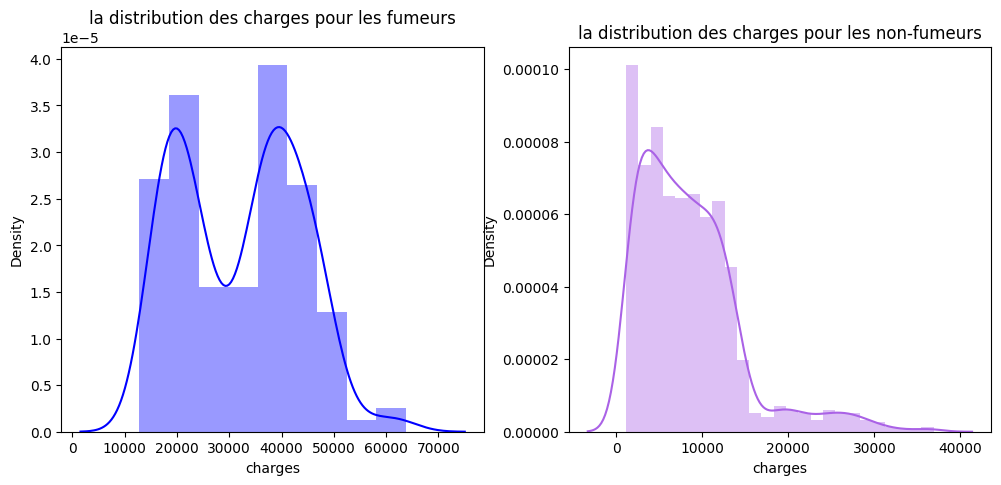

In [ ]:
f=plt.figure(figsize=(12, 5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='b',ax=ax)
ax.set_title('la distribution des charges pour les fumeurs')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='#AA62E6',ax=ax)
ax.set_title('la distribution des charges pour les non-fumeurs')



Les patients fumeurs dépensent davantage en traitement.

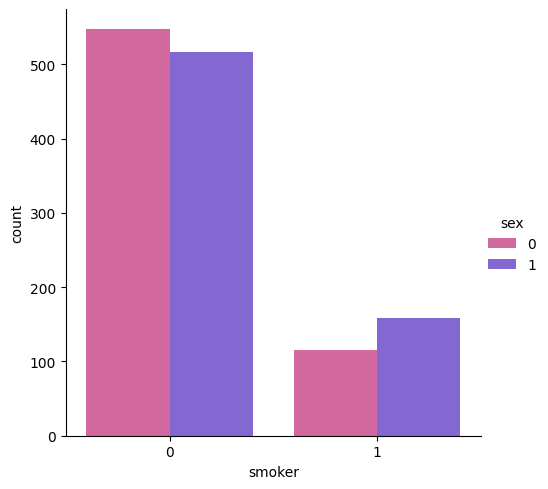

In [ ]:
custom_palette = ['#E3569F','#7A56E3']
sns.catplot(x="smoker", kind="count", hue='sex', palette=custom_palette, data=df)

Veuillez noter que :
* 0: Femme
* 1: Homme

On remarque que les non-fumeurs (smoker vaut à 0) sont plus nombreux. Nous pouvons également remarquer qu’il y a plus de fumeurs masculins que de femmes fumeuses. On peut supposer que le coût total du traitement chez les hommes sera plus élevé que chez les femmes, compte tenu de l'impact du tabagisme.

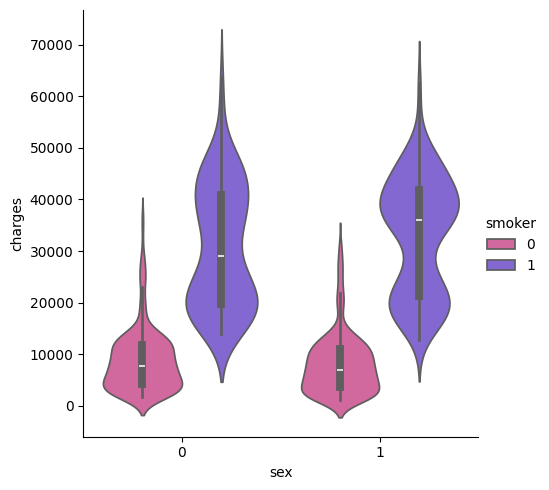

In [ ]:
sns.catplot(x="sex", y="charges",kind="violin", hue="smoker", palette=custom_palette, data=df)

Ce code utilise la bibliothèque Seaborn pour créer un graphique de type violon (violin plot) pour visualiser la distribution des charges médicales en fonction du sexe, avec une distinction entre les fumeurs et les non-fumeurs.
Voici quelques observations que l'on peut faire à partir de ce graphique :

* Pour les deux catégories de sexe, les fumeurs (bleu) semblent avoir des charges plus élevées que les non-fumeurs (rose).
* Les distributions pour les non-fumeurs ont une queue inférieure plus prononcée, indiquant un nombre plus élevé de non-fumeurs avec de faibles charges.
* Les distributions pour les fumeurs sont plus larges, ce qui signifie qu'il y a une plus grande variation dans les charges parmi les fumeurs.

<ipython-input-165-bd6103e3fd6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = palette_color)
<ipython-input-165-bd6103e3fd6e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = palette_color)


Text(0.5, 1.0, 'Box plot for charges of men')

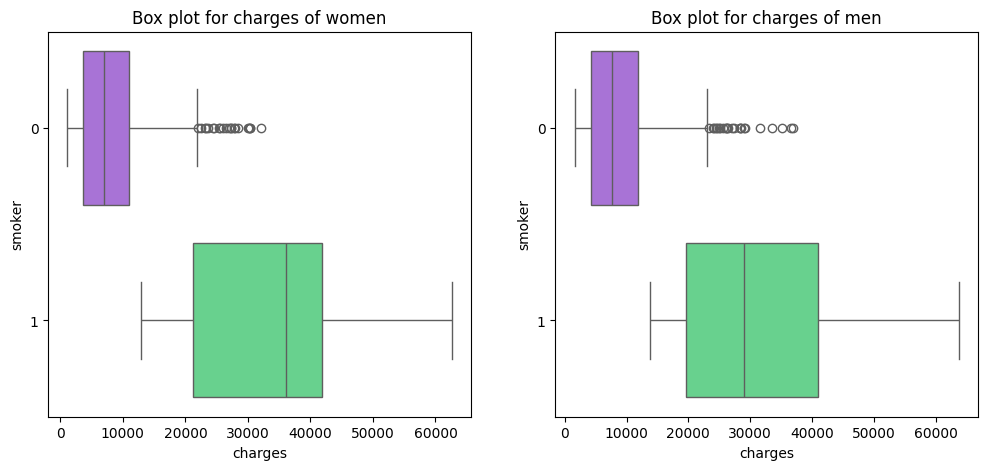

In [ ]:
f=plt.figure(figsize=(12, 5))
palette_color=['#AA62E6','#56E389']
ax=f.add_subplot(121)
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = palette_color)
ax.set_title('Box plot for charges of women')

ax=f.add_subplot(122)
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = palette_color)
ax.set_title('Box plot for charges of men')


<ipython-input-166-2f3848f86d6f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["age"], color = '#EEA421')


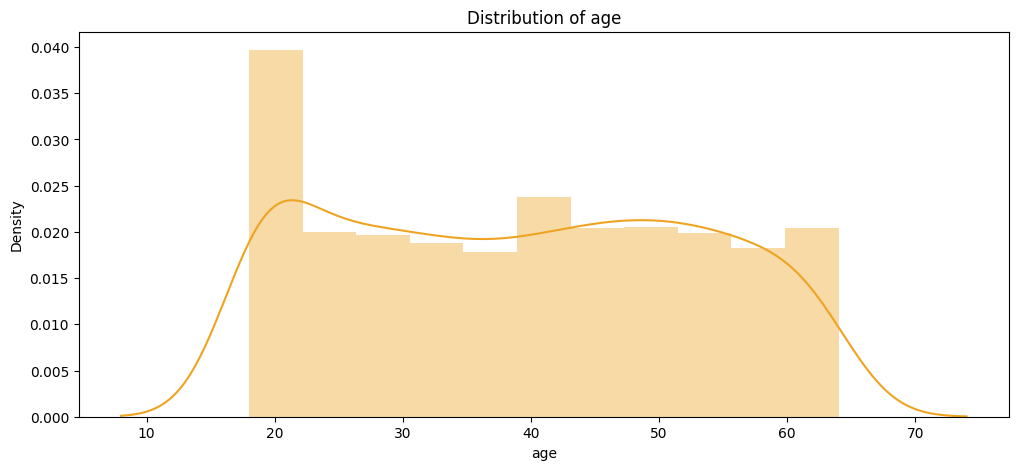

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = '#EEA421')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

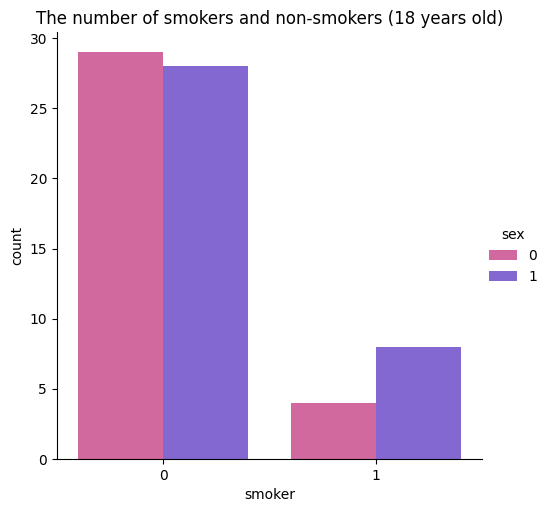

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette=custom_palette, data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

on a plus de non fumeurs que des fumeurs pour patients qui ont 18 ans.

Le tabagisme affecte-t-il le coût du traitement à cet âge ?

<ipython-input-168-8a98998433d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = palette_color)


<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

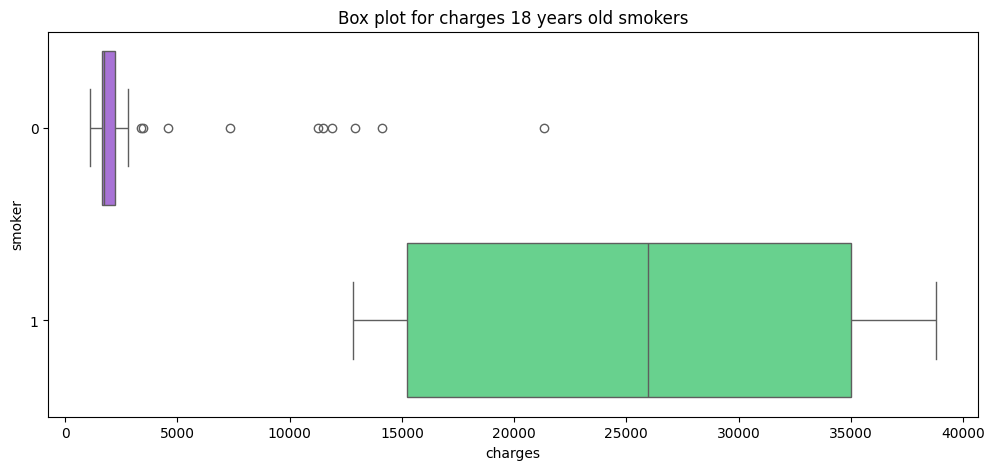

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = palette_color)

Comme on peut le constater, même à 18 ans, les fumeurs dépensent beaucoup plus en traitement que les non-fumeurs. Chez les non-fumeurs, nous constatons des « queues ». On peux supposer que cela est dû à des maladies graves ou à des accidents. Voyons maintenant comment le coût du traitement dépend de l'âge des patients fumeurs et non-fumeurs.

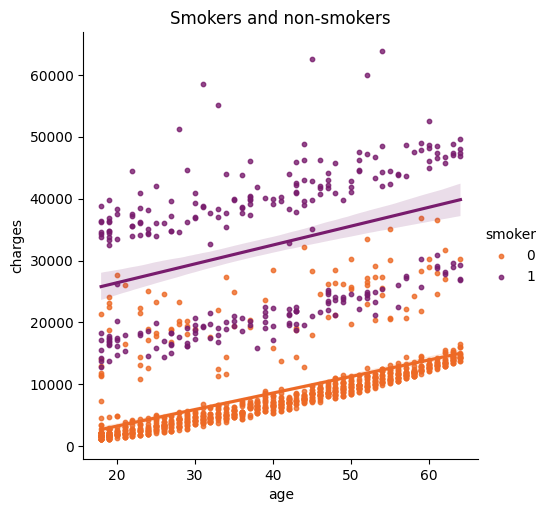

In [ ]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette='inferno_r', scatter_kws={"s": 10})
plt.title('Smokers and non-smokers')
plt.show()

Chez les non-fumeurs, le coût du traitement augmente avec l’âge.

<ipython-input-170-c9ffcbc78663>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["bmi"], color = 'm')


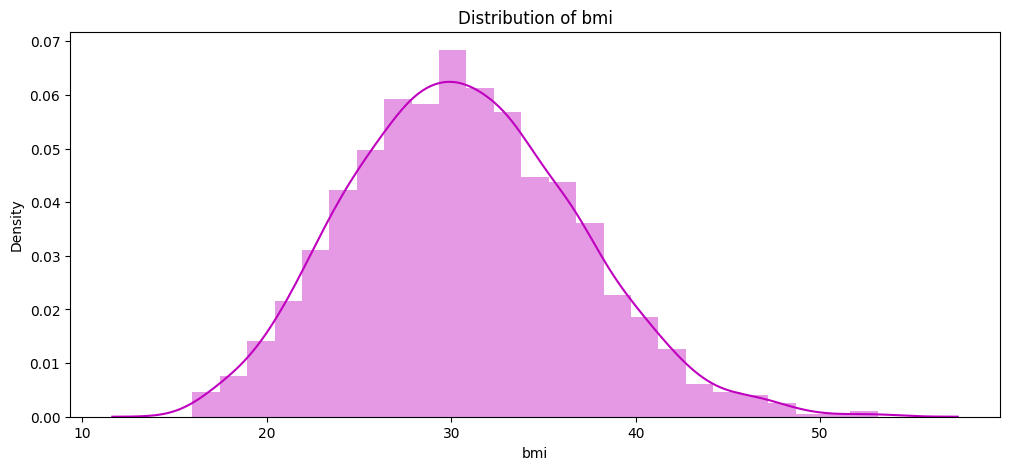

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

la moyenne du BMI des patients est de 30. Avec une valeur égale à 30, l'obésité commence.


<ipython-input-171-135b4447205b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = '#66941B')


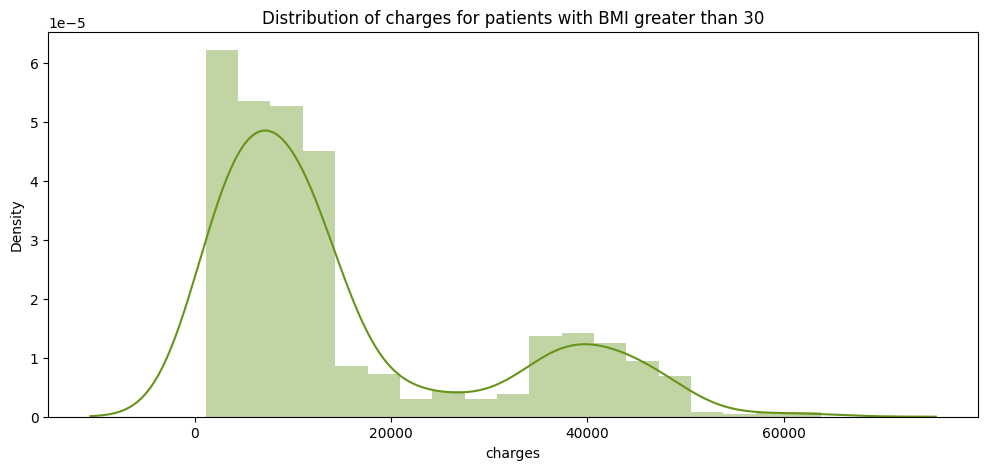

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = '#66941B')

<ipython-input-172-ae07c0a4d733>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = '#1B9468')


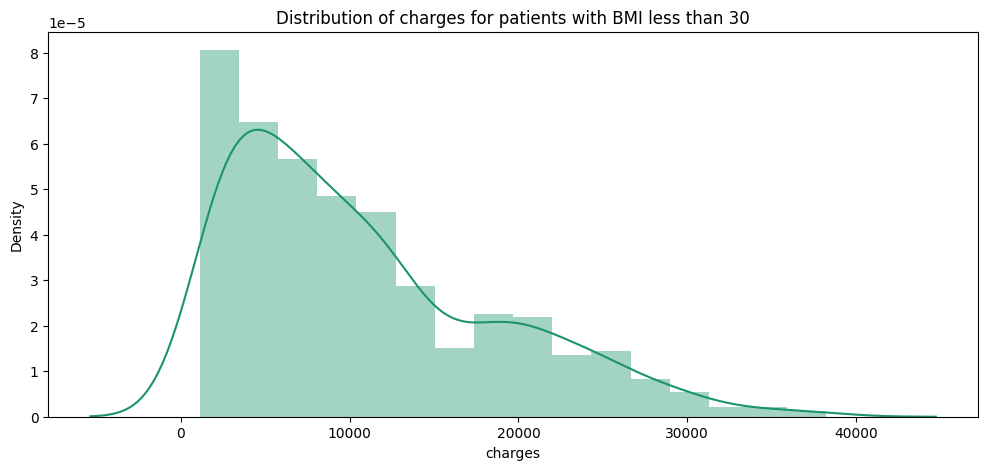

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = '#1B9468')

Les patients avec un BMI supérieur à 30 dépensent plus en traitement !

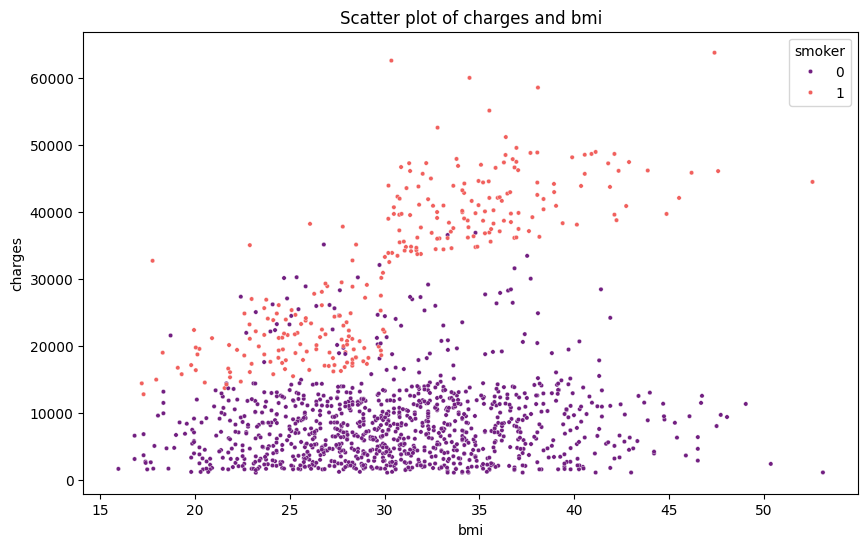

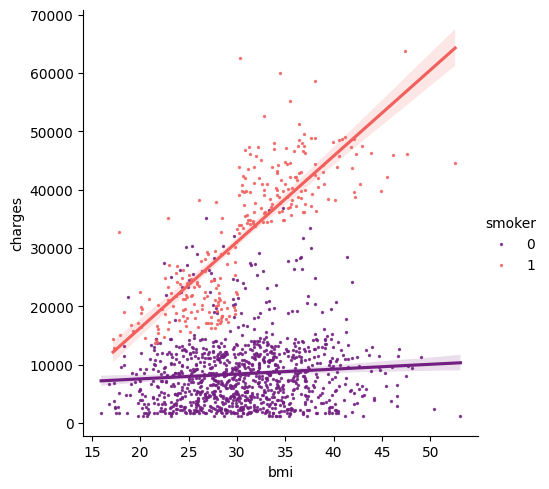

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker',s=10)
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', scatter_kws={"s": 2})

Voyons d’abord combien d’enfants nos patients ont.

<ipython-input-174-c35ad84c5b8f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="children", kind="count", palette="magma", data=df)


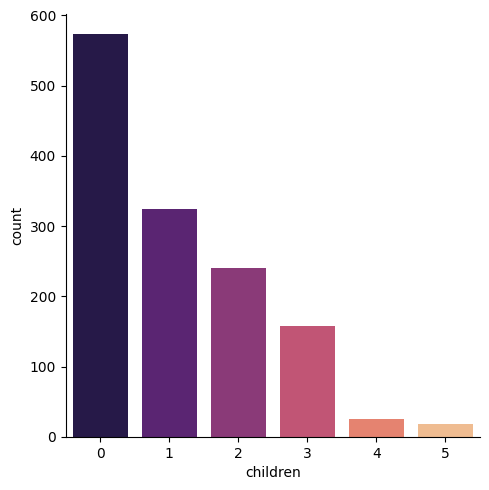

In [ ]:
sns.catplot(x="children", kind="count", palette="magma", data=df)

La plupart des patients n'ont pas d'enfants. Parfaitement que certains aient 5 enfants !

Est ce que les gens qui ont des enfants fument?

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

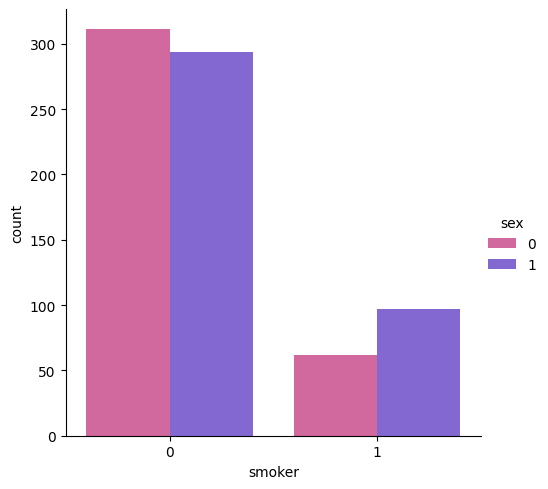

In [ ]:
sns.catplot(x="smoker", kind="count", palette=custom_palette,hue = "sex",data=df[(df.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')

on remarque qu'il y ait bien plus de parents non-fumeurs

# Régression

Le but est de prédire le cout de traitement, on commence par importer les bibliothèques dont on aurait besoin

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

## Régression linéaire

### Régression linéaire simple avec la variable "Smoker"

In [ ]:
# Sélectionner les caractéristiques et la cible
X = df['smoker'].values.reshape(-1, 1)
y = df['charges']

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Créer une instance du modèle de régression linéaire
model1 = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model1.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred1 = model1.predict(X_test)

In [ ]:
# Afficher les coefficients du modèle
print('Coefficient:', model1.coef_)
print('Intercept:', model1.intercept_)

Coefficient: [23188.68587068]
Intercept: 8578.322547999996


Cela suggère qu'être fumeur est fortement associé à des coûts de traitement plus élevés, selon ce modèle.

In [ ]:
# Afficher les performances du modèle
print('Score (R-squared):', model1.score(X_test, y_test))

Score (R-squared): 0.6602486589056528


Cela signifie que le modèle est capable d'expliquer une partie significative de la variabilité des charges à l'aide de la variable 'smoker'. Cependant, il reste encore environ 33.98% de la variance qui n'est pas expliquée par le modèle.

In [ ]:
# Calculer le coefficient de détermination (R-squared)
r_squared = r2_score(y_test, y_pred1)

# Nombre d'observations (n)
n = len(y_test)

# Nombre de caractéristiques (p)
p = X.shape[1]

# Calculer le coefficient de détermination ajusté (adjusted R-squared)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.658971398224847


Cette valeur est proche de 1 ce qu'indique que le modèle est de bonne qualité

#### Tester la validité du modèle

##### Indépendance des variables

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calculer les résidus
residuals = y_test - y_pred1
# Calculer la statistique de Durbin-Watson
durbin_watson_stat = durbin_watson(residuals)

print("Durbin-Watson Statistic:", durbin_watson_stat)

Durbin-Watson Statistic: 2.149713726495625


Cette valeur est proche de 2 indique qu'il n'y a pas d'autocorrélation dans les résidus.

##### Résidus distribués selon une loi normale de moyenne 0

In [ ]:
from scipy.stats import shapiro

# Effectuer le test de normalité de Shapiro-Wilk
statistic, p_value = shapiro(residuals)

print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les résidus suivent une distribution normale (ne rejeter pas H0)")
else:
    print("Les résidus ne suivent pas une distribution normale (rejeter H0)")

Shapiro-Wilk Test Statistic: 0.9376480579376221
p-value: 3.2076048483986597e-09
Les résidus ne suivent pas une distribution normale (rejeter H0)


### Regression linéaire simple avec la variable "Age".

In [ ]:
# Sélectionner les caractéristiques et la cible
X = df['age'].values.reshape(-1, 1)
y = df['charges']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model2.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred2 = model2.predict(X_test)

# Afficher les coefficients du modèle
print('Coefficient:', model2.coef_)
print('Intercept:', model2.intercept_)

# Afficher les performances du modèle
print('Score (R-squared):', model2.score(X_test, y_test))

# Calculer le coefficient de détermination (R-squared)
r_squared = r2_score(y_test, y_pred2)

# Nombre d'observations (n)
n = len(y_test)

# Nombre de caractéristiques (p)
p = X.shape[1]

# Calculer le coefficient de détermination ajusté (adjusted R-squared)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r_squared)

Coefficient: [240.59655979]
Intercept: 3876.928684191691
Score (R-squared): 0.12408973539501944
Adjusted R-squared: 0.1207968396634218


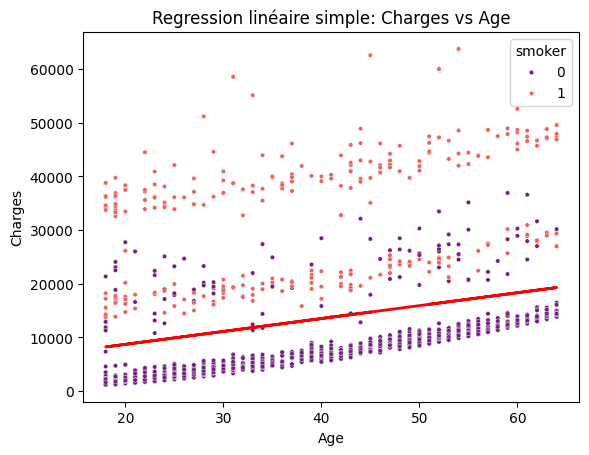

In [ ]:
ax = sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',s=10)
plt.plot(X_test, y_pred2, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Regression linéaire simple: Charges vs Age')
plt.show()


#### Tester la validité du modèle

##### Indépendance des variables

In [ ]:
# Calculer les résidus
residuals = y_test - y_pred2

from statsmodels.stats.stattools import durbin_watson

# Calculer la statistique de Durbin-Watson
durbin_watson_stat = durbin_watson(residuals)

print("Durbin-Watson Statistic:", durbin_watson_stat)

Durbin-Watson Statistic: 1.8554934075110674


##### Résidus distribués selon une loi normale de moyenne 0

In [ ]:
from scipy.stats import shapiro

# Effectuer le test de normalité de Shapiro-Wilk
statistic, p_value = shapiro(residuals)

print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les résidus suivent une distribution normale (ne rejeter pas H0)")
else:
    print("Les résidus ne suivent pas une distribution normale (rejeter H0)")

Shapiro-Wilk Test Statistic: 0.6457551717758179
p-value: 3.0680173222020234e-23
Les résidus ne suivent pas une distribution normale (rejeter H0)


### Regression linéaire simple avec la variable "BMI"

In [ ]:
# Sélectionner les caractéristiques et la cible
X = df['bmi'].values.reshape(-1, 1)
y = df['charges']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3= LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model3.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred3 = model3.predict(X_test)

# Afficher les coefficients du modèle
print('Coefficient:', model3.coef_)
print('Intercept:', model3.intercept_)

# Afficher les performances du modèle
print('Score (R-squared):', model3.score(X_test, y_test))

# Calculer le coefficient de détermination (R-squared)
r_squared = r2_score(y_test, y_pred3)

# Nombre d'observations (n)
n = len(y_test)

# Nombre de caractéristiques (p)
p = X.shape[1]

# Calculer le coefficient de détermination ajusté (adjusted R-squared)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r_squared)

Coefficient: [392.43654417]
Intercept: 1353.0730722046683
Score (R-squared): 0.03970193117941878
Adjusted R-squared: 0.036091788063551955


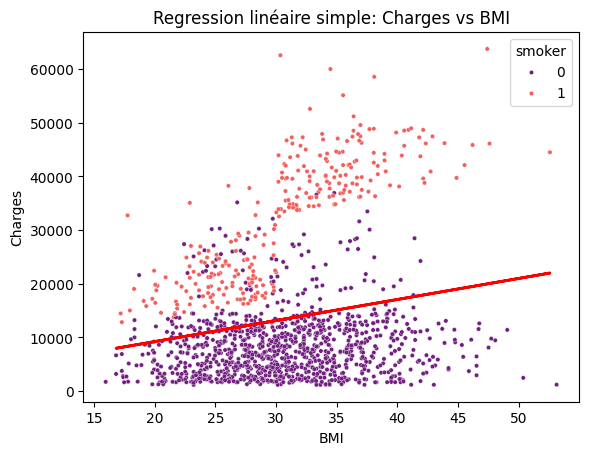

In [ ]:
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker',s=10)
plt.plot(X_test, y_pred3, color='red', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Regression linéaire simple: Charges vs BMI')
plt.show()


#### Tester la validité du modèle

##### Indépendance des variables

In [ ]:
# Calculer les résidus
residuals = y_test - y_pred3

from statsmodels.stats.stattools import durbin_watson

# Calculer la statistique de Durbin-Watson
durbin_watson_stat = durbin_watson(residuals)

print("Durbin-Watson Statistic:", durbin_watson_stat)

Durbin-Watson Statistic: 1.9327022447945994


##### Résidus distribués selon une loi normale de moyenne 0

In [ ]:
# Effectuer le test de normalité de Shapiro-Wilk
statistic, p_value = shapiro(residuals)

print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les résidus suivent une distribution normale (ne rejeter pas H0)")
else:
    print("Les résidus ne suivent pas une distribution normale (rejeter H0)")

Shapiro-Wilk Test Statistic: 0.8484837412834167
p-value: 1.6580069607901563e-15
Les résidus ne suivent pas une distribution normale (rejeter H0)


### Regression linéaire simple avec la variable "children"

In [ ]:
# Sélectionner les caractéristiques et la cible
X = df['children'].values.reshape(-1, 1)
y = df['charges']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model4= LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model4.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred4 = model4.predict(X_test)

# Afficher les coefficients du modèle
print('Coefficient:', model4.coef_)
print('Intercept:', model4.intercept_)

# Afficher les performances du modèle
print('Score (R-squared):', model4.score(X_test, y_test))

# Calculer le coefficient de détermination (R-squared)
r_squared = r2_score(y_test, y_pred4)

# Nombre d'observations (n)
n = len(y_test)

# Nombre de caractéristiques (p)
p = X.shape[1]

# Calculer le coefficient de détermination ajusté (adjusted R-squared)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r_squared)

Coefficient: [710.55427752]
Intercept: 12559.167475750055
Score (R-squared): 0.0016954628730256882
Adjusted R-squared: -0.0020575617026397097


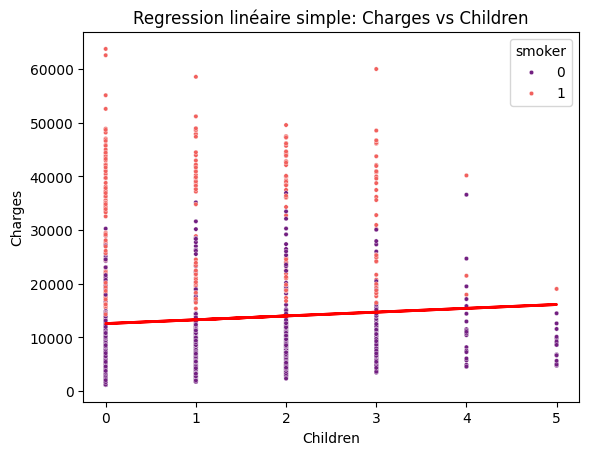

In [ ]:
ax = sns.scatterplot(x='children',y='charges',data=df,palette='magma',hue='smoker',s=10)
plt.plot(X_test, y_pred4, color='red', linewidth=2)
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Regression linéaire simple: Charges vs Children')
plt.show()

#### Tester la validité du modèle

##### Indépendance des variables

In [ ]:
# Calculer les résidus
residuals = y_test - y_pred4

from statsmodels.stats.stattools import durbin_watson

# Calculer la statistique de Durbin-Watson
durbin_watson_stat = durbin_watson(residuals)

print("Durbin-Watson Statistic:", durbin_watson_stat)

Durbin-Watson Statistic: 1.884729079071344


##### Résidus distribués selon une loi normale de moyenne 0

In [ ]:
# Effectuer le test de normalité de Shapiro-Wilk
statistic, p_value = shapiro(residuals)

print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les résidus suivent une distribution normale (ne rejeter pas H0)")
else:
    print("Les résidus ne suivent pas une distribution normale (rejeter H0)")

Shapiro-Wilk Test Statistic: 0.7908051013946533
p-value: 3.028606627962613e-18
Les résidus ne suivent pas une distribution normale (rejeter H0)


### Regression linéaire simple avec la variable "Region"

In [ ]:
# Sélectionner les caractéristiques et la cible
X = df['region'].values.reshape(-1, 1)
y = df['charges']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model5= LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model5.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred5 = model5.predict(X_test)

# Afficher les coefficients du modèle
print('Coefficient:', model5.coef_)
print('Intercept:', model5.intercept_)

# Afficher les performances du modèle
print('Score (R-squared):', model5.score(X_test, y_test))

# Calculer le coefficient de détermination (R-squared)
r_squared = r2_score(y_test, y_pred5)

# Nombre d'observations (n)
n = len(y_test)

# Nombre de caractéristiques (p)
p = X.shape[1]

# Calculer le coefficient de détermination ajusté (adjusted R-squared)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r_squared)

Coefficient: [-1.28693533]
Intercept: 13348.030964052867
Score (R-squared): -0.0009124505146014261
Adjusted R-squared: -0.004675279275934585


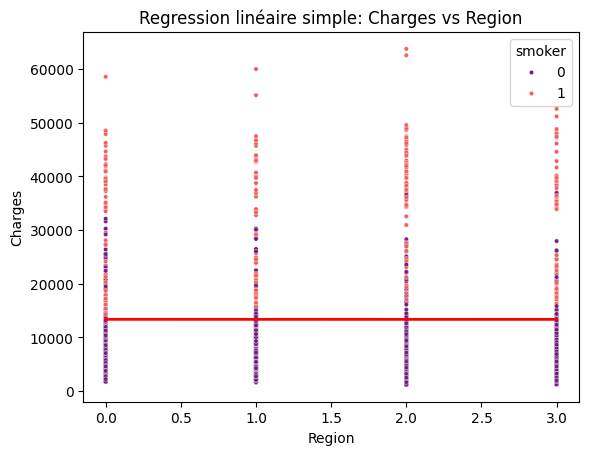

In [ ]:
ax = sns.scatterplot(x='region',y='charges',data=df,palette='magma',hue='smoker',s=10)
plt.plot(X_test, y_pred5, color='red', linewidth=2)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Regression linéaire simple: Charges vs Region')
plt.show()

#### Tester la validité du modèle

##### Indépendance des variables

In [ ]:
# Calculer les résidus
residuals = y_test - y_pred5

from statsmodels.stats.stattools import durbin_watson

# Calculer la statistique de Durbin-Watson
durbin_watson_stat = durbin_watson(residuals)

print("Durbin-Watson Statistic:", durbin_watson_stat)

Durbin-Watson Statistic: 1.8980851708047684


##### Résidus distribués selon une loi normale de moyenne 0

In [ ]:
# Effectuer le test de normalité de Shapiro-Wilk
statistic, p_value = shapiro(residuals)

print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les résidus suivent une distribution normale (ne rejeter pas H0)")
else:
    print("Les résidus ne suivent pas une distribution normale (rejeter H0)")

Shapiro-Wilk Test Statistic: 0.7995873689651489
p-value: 7.233191530963795e-18
Les résidus ne suivent pas une distribution normale (rejeter H0)


### Comparer entre les modèles

In [ ]:
from statsmodels.tools.eval_measures import aic
from statsmodels.tools.eval_measures import bic

# Nombre d'observations
n = len(y_test)

# Nombre de caractéristiques dans chaque modèle (le nombre de colonnes dans X)
p1 = df["smoker"].values.reshape(-1,1).shape[1] + 1
p2 = df["age"].values.reshape(-1,1).shape[1] + 1
p3 = df["bmi"].values.reshape(-1,1).shape[1] + 1
p4 = df["children"].values.reshape(-1,1).shape[1] + 1
p5 = df["region"].values.reshape(-1,1).shape[1] + 1

# Calculer l'erreur quadratique moyenne (MSE) pour chaque modèle
mse_1 = mean_squared_error(y_test, y_pred1)
mse_2 = mean_squared_error(y_test, y_pred2)
mse_3 = mean_squared_error(y_test, y_pred3)
mse_4 = mean_squared_error(y_test, y_pred4)
mse_5 = mean_squared_error(y_test, y_pred5)

# Calculer l'AIC pour chaque modèle
aic_1 = n * np.log(mse_1) + 2 * p1
aic_2 = n * np.log(mse_2) + 2 * p2
aic_3 = n * np.log(mse_3) + 2 * p3
aic_4 = n * np.log(mse_4) + 2 * p4
aic_5 = n * np.log(mse_5) + 2 * p5

print("AIC for model 1:", aic_1)
print("AIC for model 2:", aic_2)
print("AIC for model 3:", aic_3)
print("AIC for model 4:", aic_4)
print("AIC for model 5:", aic_5)

# Calculer le BIC pour chaque modèle
bic_1 = n * np.log(mse_1) + np.log(n) * p1
bic_2 = n * np.log(mse_2) + np.log(n) * p2
bic_3 = n * np.log(mse_3) + np.log(n) * p3
bic_4 = n * np.log(mse_4) + np.log(n) * p4
bic_5 = n * np.log(mse_5) + np.log(n) * p5

print("BIC for model 1:", bic_1)
print("BIC for model 2:", bic_2)
print("BIC for model 3:", bic_3)
print("BIC for model 4:", bic_4)
print("BIC for model 4:", bic_5)

AIC for model 1: 4769.3074182625705
AIC for model 2: 5023.1167238469
AIC for model 3: 5047.767384376069
AIC for model 4: 5058.16971126219
AIC for model 5: 5058.868906185644
BIC for model 1: 4776.489392223592
BIC for model 2: 5030.298697807922
BIC for model 3: 5054.94935833709
BIC for model 4: 5065.3516852232115
BIC for model 4: 5066.050880146666


Le modèle 1 est donc préférable aux modèles 2, 3, 4 et 5

### RLM

In [ ]:
# Les caractéristiques et la cible
X = df[['age', 'bmi', 'children', 'smoker','region']]
y = df['charges']

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Créer une instance du modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test)

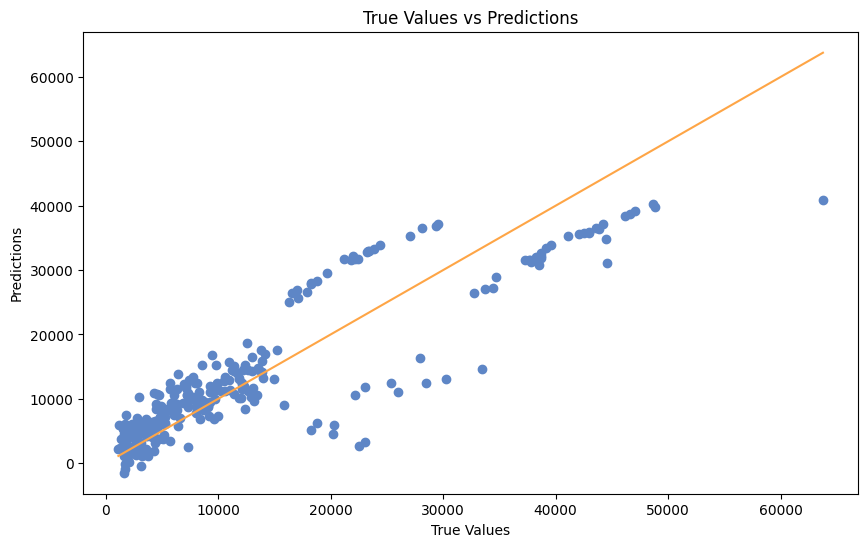

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#5E86C6', label='Actual vs Predicted')

# Ajouter une ligne d'identité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#FEA546')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

In [ ]:
# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Afficher les coefficients du modèle
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients:\n", coefficients)

# Afficher l'ordonnée à l'origine (intercept)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 33640657.13645164
Coefficients:
            Coefficient
age         257.061458
bmi         335.751090
children    424.964031
smoker    23646.187562
region     -271.129915
Intercept: -11955.262408936005


ce modèle semble capturer certaines relations entre les caractéristiques (âge, bmi, nombre d'enfants et statut de fumeur) et les charges, mais il présente encore une erreur relativement élevée dans ses prédictions.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Effectuer la validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Définir la validation croisée avec 5 plis
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')  # Calculer les scores de validation croisée

# Convertir les scores de MSE négatifs en MSE positifs
cv_scores_positive = -cv_scores

# Calculer la moyenne et l'écart type des scores de MSE
mean_cv_mse = np.mean(cv_scores_positive)
std_cv_mse = np.std(cv_scores_positive)

# Afficher les résultats de la validation croisée
print("Cross-Validation MSE Scores:")
print(cv_scores_positive)
print("Mean CV MSE:", mean_cv_mse)
print("Standard Deviation CV MSE:", std_cv_mse)

# Calculer et afficher le MSE sur l'ensemble de test
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)


Cross-Validation MSE Scores:
[33640657.13645162 37098914.6682766  33255343.07535101 41471354.56702041
 38850707.68364853]
Mean CV MSE: 36863395.42614964
Standard Deviation CV MSE: 3119046.3483616617
Test MSE: 33640657.13645164


Ces résultats indiquent que le modèle a une performance moyenne à assez élevée en termes d'erreur quadratique moyenne. Cependant, la variabilité des performances sur différents plis suggère que le modèle peut être sensible à la répartition spécifique des données

#### Ajustement du modèle en enlevant les variables non significatives

In [ ]:
import statsmodels.api as sm

# Ajouter une colonne constante à la matrice de caractéristiques
X_with_const = sm.add_constant(X)

# Ajuster le modèle de régression linéaire multiple
model = sm.OLS(y, X_with_const).fit()

# Obtenir les résultats du test de Student pour chaque coefficient
t_test_results = model.summary().tables[1]

# Extraire les p-values des coefficients
p_values = model.pvalues[1:]  # Exclure la constante

# Identifier les indices des variables non significatives (p-value > seuil)
seuil = 0.05
non_significatives = p_values[p_values > seuil].index

# Supprimer les variables non significatives du modèle
X_filtre = X.drop(non_significatives, axis=1)

# Ajuster un nouveau modèle avec les variables filtrées
model_filtre = sm.OLS(y, sm.add_constant(X_filtre)).fit()

# Afficher les résultats du modèle filtré
print(model_filtre.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:44:54   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.187e+04    945.876    -12.546      0.0

Les résultats de la régression linéaire multiple indiquent une R-squared (R²) de 0.751, ce qui signifie que environ 75.1 % de la variance dans les charges est expliquée par les variables incluses dans le modèle. Le F-statistic de 802.2 avec une probabilité associée proche de zéro confirme la significativité globale du modèle. En examinant les coefficients, on constate que toutes les variables (âge, BMI, nombre d'enfants, fumeur et région) sont statistiquement significatives (p-value < 0.05), ce qui suggère qu'elles ont un impact significatif sur les charges. Le modèle ajusté semble bien s'adapter aux données, avec un Durbin-Watson proche de 2 indiquant une faible autocorrélation des résidus et des valeurs de Jarque-Bera et de Kurtosis suggérant une distribution des résidus relativement proche de la normale. En conclusion, le modèle semble être un ajustement approprié aux données avec des variables significatives pour prédire les charges.

## Regression non linéaire(polynomiale)

In [ ]:
# Transformer les caractéristiques X en des termes polynomiaux
poly_features = PolynomialFeatures(degree=2)  # Choisir le degré du polynôme (ici, 2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
# Entraîner le modèle sur les données transformées
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test_poly)

In [ ]:
# Calculer l'erreur quadratique moyenne (MSE) sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Afficher les résultats de la régression polynomiale
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 20441422.30478296
Coefficients: [ 0.00000000e+00 -9.95147239e+01  5.15476279e+02  1.21658159e+03
 -1.01510574e+04 -1.88376186e+02  3.94991293e+00  6.60782568e-01
 -3.19593254e+00  3.61688445e+00  1.99619366e+01 -7.48863600e+00
  8.77874563e+00  1.43304087e+03 -3.89674217e+01 -1.03620460e+02
 -4.30579125e+02 -2.03026486e+02 -1.01510574e+04  3.98935178e+02
  1.11149226e+02]
Intercept: -4135.178461011836


Les coefficients du modèle indiquent l'importance de chaque terme polynomial dans la prédiction des charges. Comme nous avons utilisé un polynôme d'ordre 2, le modèle comprend des termes d'interaction entre les caractéristiques ainsi que des termes quadratiques. Par exemple, le coefficient associé à la caractéristique 'age' est d'environ -93.36, ce qui signifie que pour chaque année d'augmentation dans l'âge, les charges diminuent en moyenne d'environ 93.36 unités lorsque d'autres variables sont maintenues constantes.